In [13]:
import cv2
import numpy as np
import math
import imutils
from matplotlib import pyplot as plt
from ponyslayer.utils import imshow, imshows, imdraw, imdraws, imdraws_color, immask, immasks, implot, imsave
from ponyslayer import unicorn, transform, chessboard_detection
from Kmean_BG_segment import segment

Parameter Setup

In [14]:
image_resolution = 800 # [pixel] Image ratio can be only 1:1
image_size = 400 # [mm.]
marker_size = 60 # [mm.]
marker_size_error = 0.15 # [ratio] Allowable card size error
min_path_length = 30 # [mm.]
max_path_length = 999 # [mm.]
min_path_width = 5 # [mm.]
max_path_width = marker_size + (marker_size*marker_size_error) # [mm.]
gradient_crop_ratio = 0.9 # Exclude both end (prevent too width range from noise)
min_height = 10
max_height = 20
min_intensity_range = 15 # ช่วงของ intensity ที่แคบที่สุดที่ยังถือว่าเป็น gradient

Filter Setup

In [15]:
UnsharpMaskBeforeFindMarker = True
BlurKernelSize = (3, 3)

Load Image

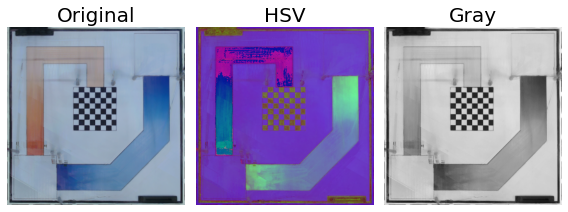

In [19]:
frame = cv2.imread("X:/final/Median with valid mask.png")
frame = imutils.resize(frame, height=image_resolution, width = image_resolution)
original = frame.copy()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.GaussianBlur(gray, BlurKernelSize, 0)
HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
imshows([cv2.cvtColor(original, cv2.COLOR_BGR2RGB), HSV, gray], ["Original", 'HSV', 'Gray'])
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frame = cv2.medianBlur(frame,5)
frame = cv2.bilateralFilter(frame,9,75,75)

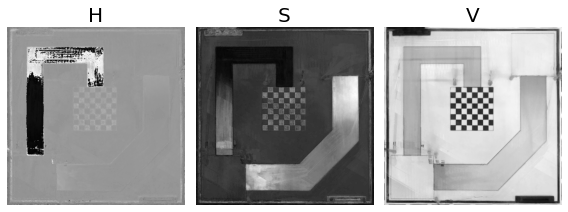

interactive(children=(IntSlider(value=2, description='n', max=10, min=2), Output()), _dom_classes=('widget-int…

<function __main__.apply_kmean(n)>

In [32]:
from ponyslayer.filter import kmean
H, S, V = cv2.split(HSV)
imshows([H, S, V], ['H', 'S', 'V'])
%matplotlib inline
from ipywidgets import interact, widgets
def inrange(low_H, high_H, low_S, high_S, low_V, high_V):
    filtered = cv2.inRange(HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))
    imshow(filtered)
def apply_kmean(n):
    imshow(kmean(H, K=n))
    imshow(kmean(S, K=n))
interact(apply_kmean, n=widgets.IntSlider(min=2,max=10,step=1,value=2))
# interact(inrange, low_H=widgets.IntSlider(min=0,max=255,step=1,value=0),
#          high_H=widgets.IntSlider(min=0,max=255,step=1,value=255),
#          low_S=widgets.IntSlider(min=0,max=255,step=1,value=0),
#          high_S=widgets.IntSlider(min=0,max=255,step=1,value=255),
#          low_V=widgets.IntSlider(min=0,max=255,step=1,value=0),
#          high_V=widgets.IntSlider(min=0,max=255,step=1,value=255),);

In [39]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=5, min_samples=5).fit(gray)
print(clustering.labels_)
imshow(clustering.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -

error: OpenCV(4.2.0) C:\Users\teera\opencv\opencv-4.2.0\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0x23201a0c::Set<3,4,-1>,struct cv::impl::A0x23201a0c::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


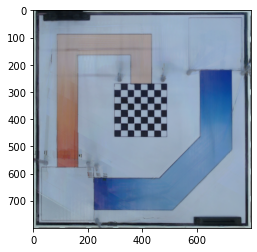

error: OpenCV(4.2.0) C:\Users\teera\opencv\opencv-4.2.0\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0x23201a0c::Set<3,4,-1>,struct cv::impl::A0x23201a0c::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


In [42]:
img= original
labimg = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
n = 0
while(n<4):
    labimg = cv2.pyrDown(labimg)
    n = n+1
feature_image=np.reshape(labimg, [-1, 3])
rows, cols, chs = labimg.shape
db = DBSCAN(eps=5, min_samples=50, metric = 'euclidean',algorithm ='auto')
db.fit(feature_image)
labels = db.labels_
indices = np.dstack(np.indices(labimg.shape[:2]))
xycolors = np.concatenate((labimg, indices), axis=-1)
feature_image2 = np.reshape(xycolors, [-1,5])
db.fit(feature_image2)
labels2 = db.labels_
imshow(img)
imshow(np.reshape(labels2, [rows, cols]))

In [ ]:
from ponyslayer.DBSCAN import DBSCAN

